In [ ]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from scipy import stats
import matplotlib.pyplot as plt
import keras.backend as K
import matplotlib.dates as mdates

In [ ]:
# Transform data into a supervised learning problem
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        X.append(a)
        Y.append(dataset[i + look_back, :])
    return np.array(X), np.array(Y)

In [ ]:
def custom_loss(y_true, y_pred):
    """
    Custom loss function that penalizes negative predictions
    for precipitation, humidity, and wind speed.
    """
    loss = K.mean(K.square(y_pred - y_true), axis=-1)
    # Penalize negative values for precipitation, humidity, and wind speed
    loss += K.mean(K.square(K.maximum(0., -y_pred[:, :3])), axis=-1)
    return loss

In [ ]:
look_back = 7 # number of previous time steps to use as input variables to predict the next time period

# Define model architecture
# Define input shape
input_data = Input(shape=(timesteps, len(features)))

# Define the encoder layers
encoder = LSTM(64, return_sequences=True)(input_data)
encoder = LSTM(32, return_sequences=True)(encoder)
encoder = LSTM(16, return_sequences=False)(encoder)

# Define the bottleneck layer
bottleneck = RepeatVector(timesteps)(encoder)

# Define the decoder layers
decoder = LSTM(16, return_sequences=True)(bottleneck)
decoder = LSTM(32, return_sequences=True)(decoder)
decoder = LSTM(64, return_sequences=True)(decoder)
decoder = TimeDistributed(Dense(len(features)))(decoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_data, outputs=decoder)
model = autoencoder

Folder /content/drive/MyDrive/Reaps_Final_Submission/ranchi already exists.
Epoch 1/10
259/259 [==============================] - 8s 6ms/step - loss: 0.0173
Epoch 2/10
259/259 [==============================] - 2s 6ms/step - loss: 0.0033
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 4/10
259/259 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 5/10
259/259 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 8/10
259/259 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 9/10
259/259 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 10/10
646/646 [==============================] - 2s 3ms/step


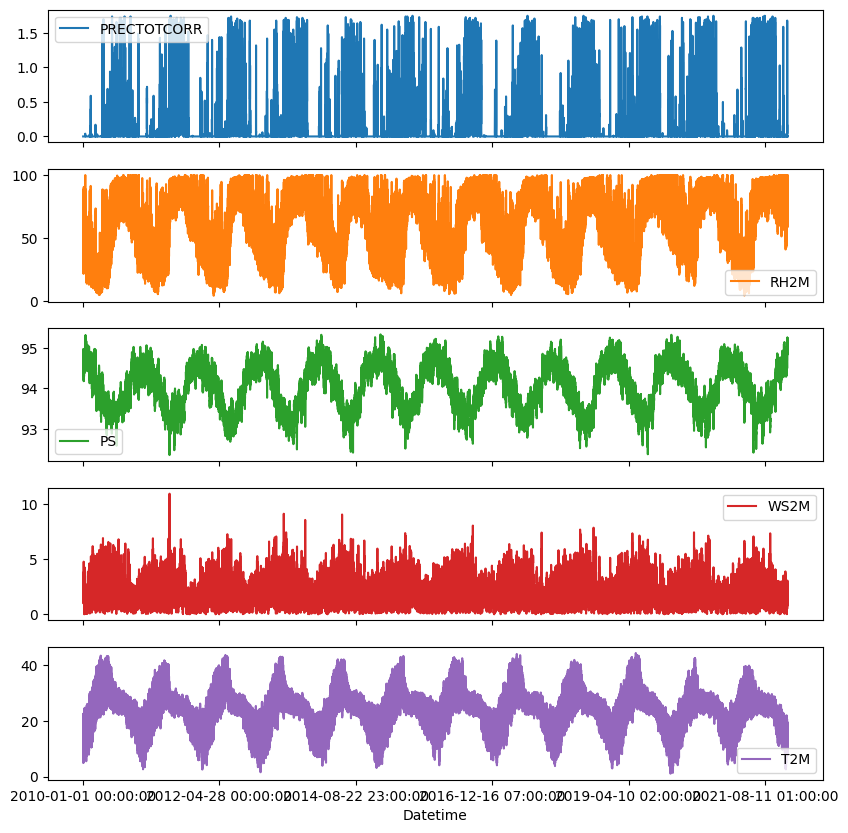

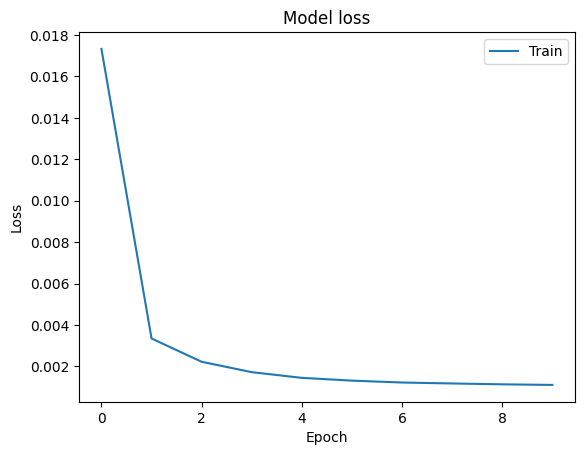

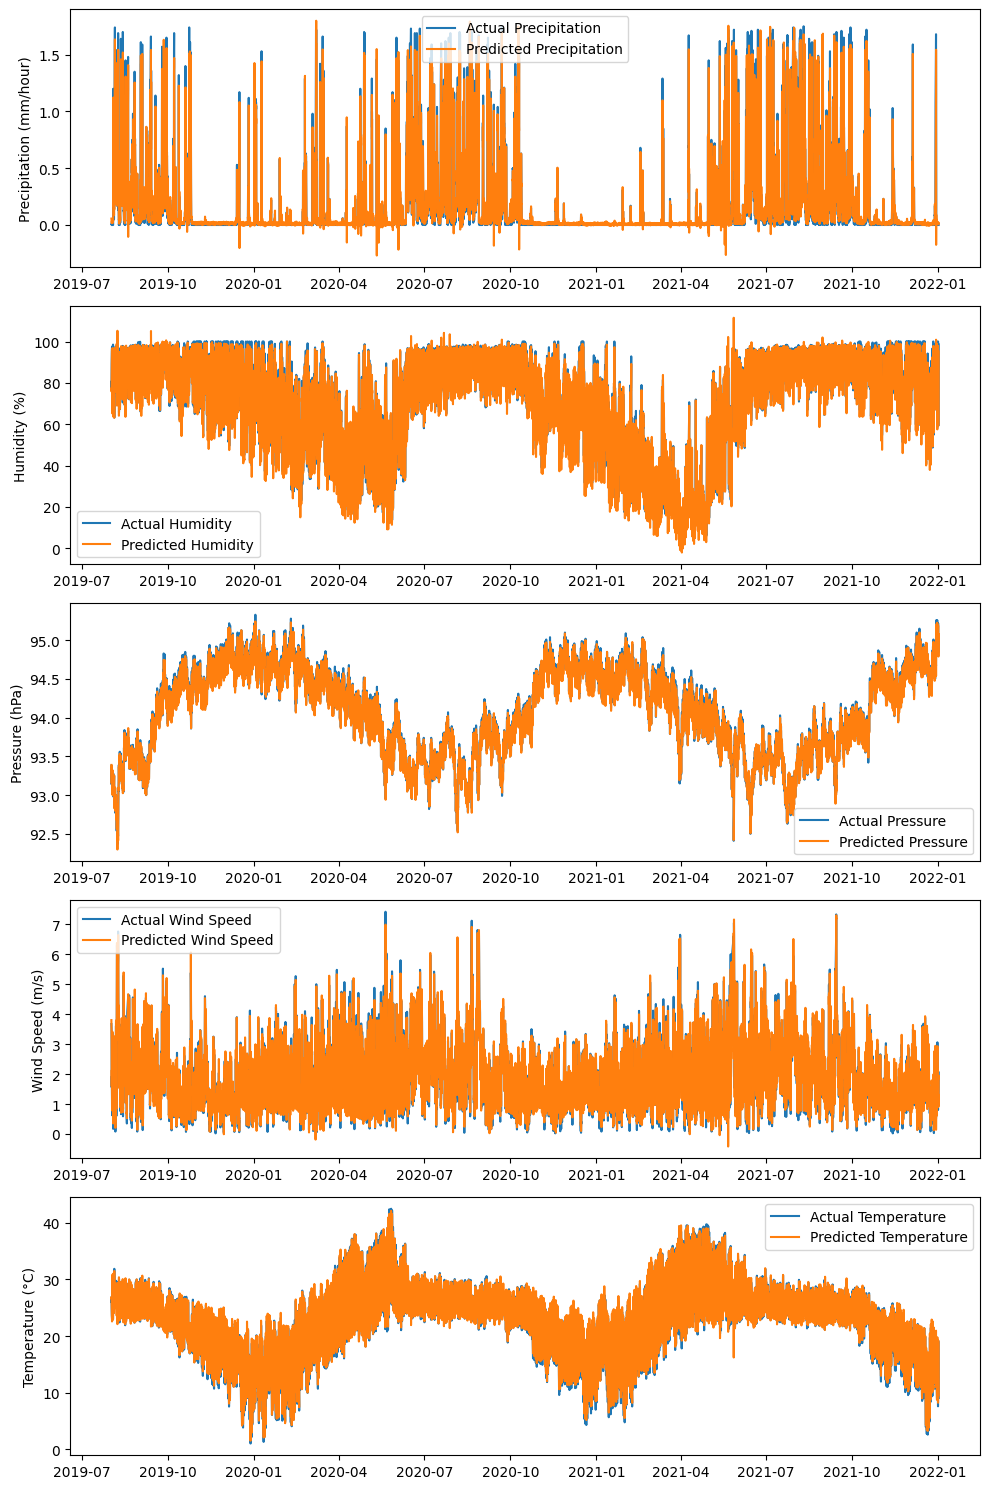

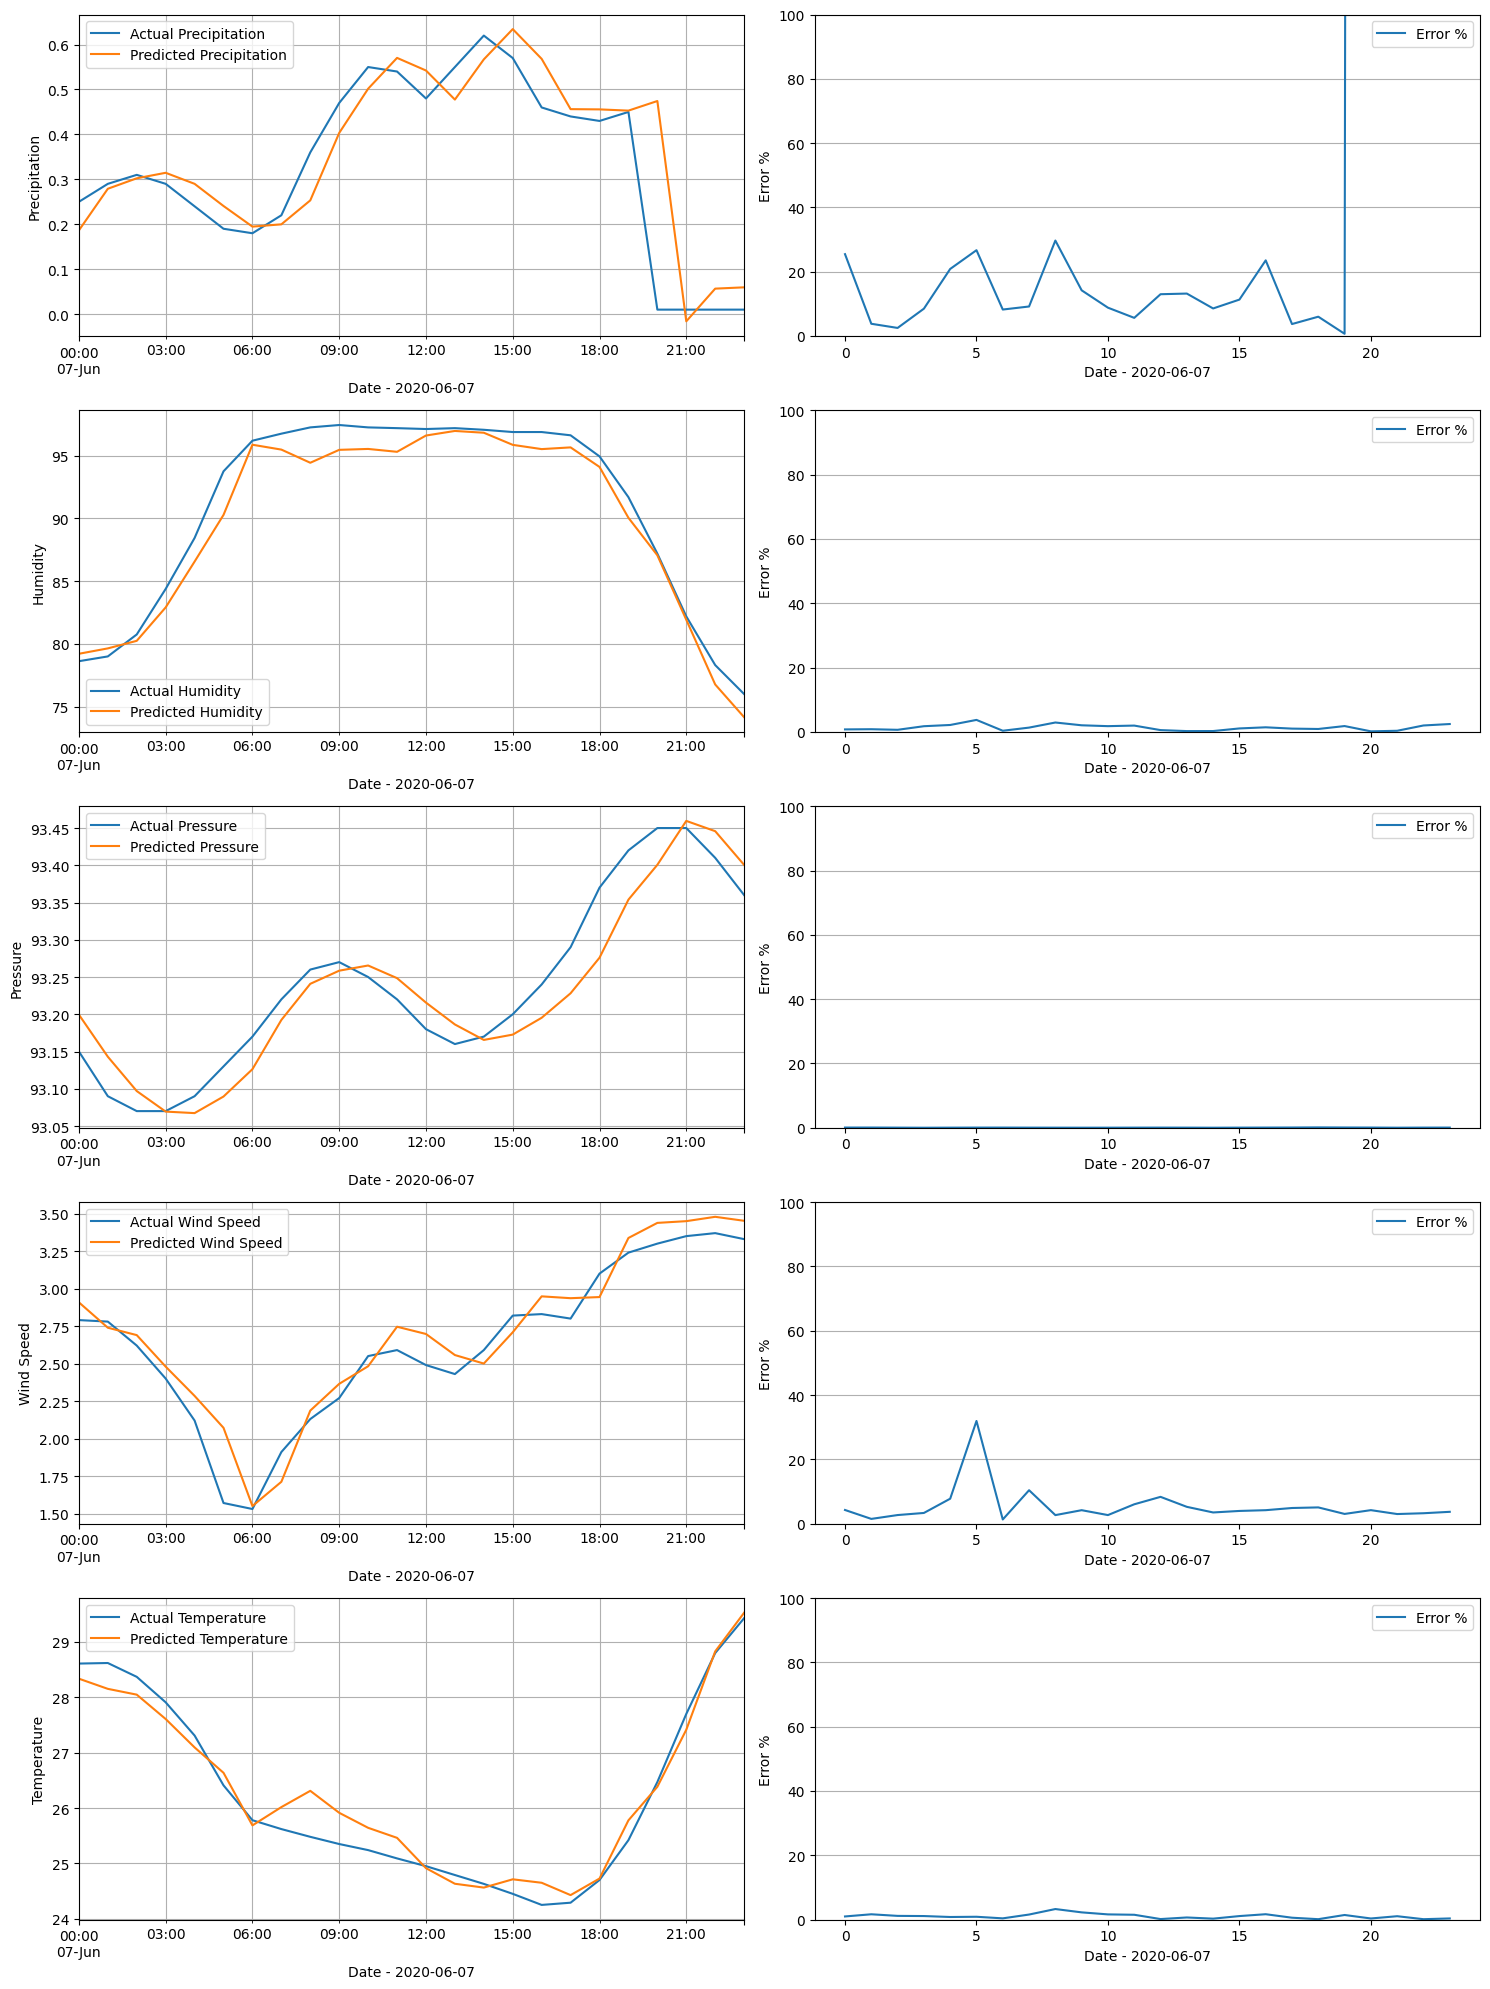

Folder /content/drive/MyDrive/Reaps_Final_Submission/srinagar already exists.
Epoch 1/10
258/258 [==============================] - 4s 5ms/step - loss: 0.0013
Epoch 2/10
258/258 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 3/10
258/258 [==============================] - 1s 5ms/step - loss: 0.0011
Epoch 4/10
258/258 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 5/10
258/258 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 6/10
258/258 [==============================] - 1s 5ms/step - loss: 0.0010
Epoch 7/10
258/258 [==============================] - 1s 5ms/step - loss: 9.9126e-04
Epoch 8/10
258/258 [==============================] - 2s 7ms/step - loss: 9.7601e-04
Epoch 9/10
258/258 [==============================] - 2s 6ms/step - loss: 9.6545e-04
Epoch 10/10
644/644 [==============================] - 2s 2ms/step


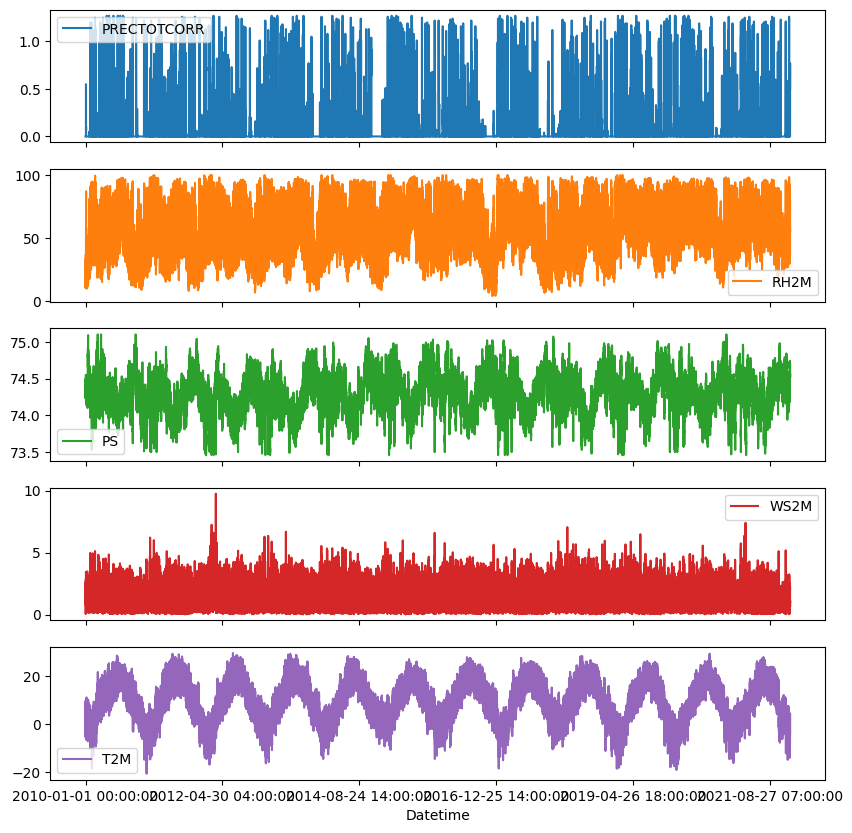

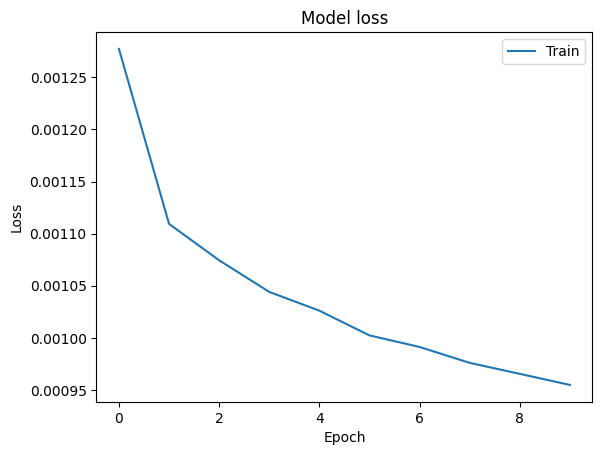

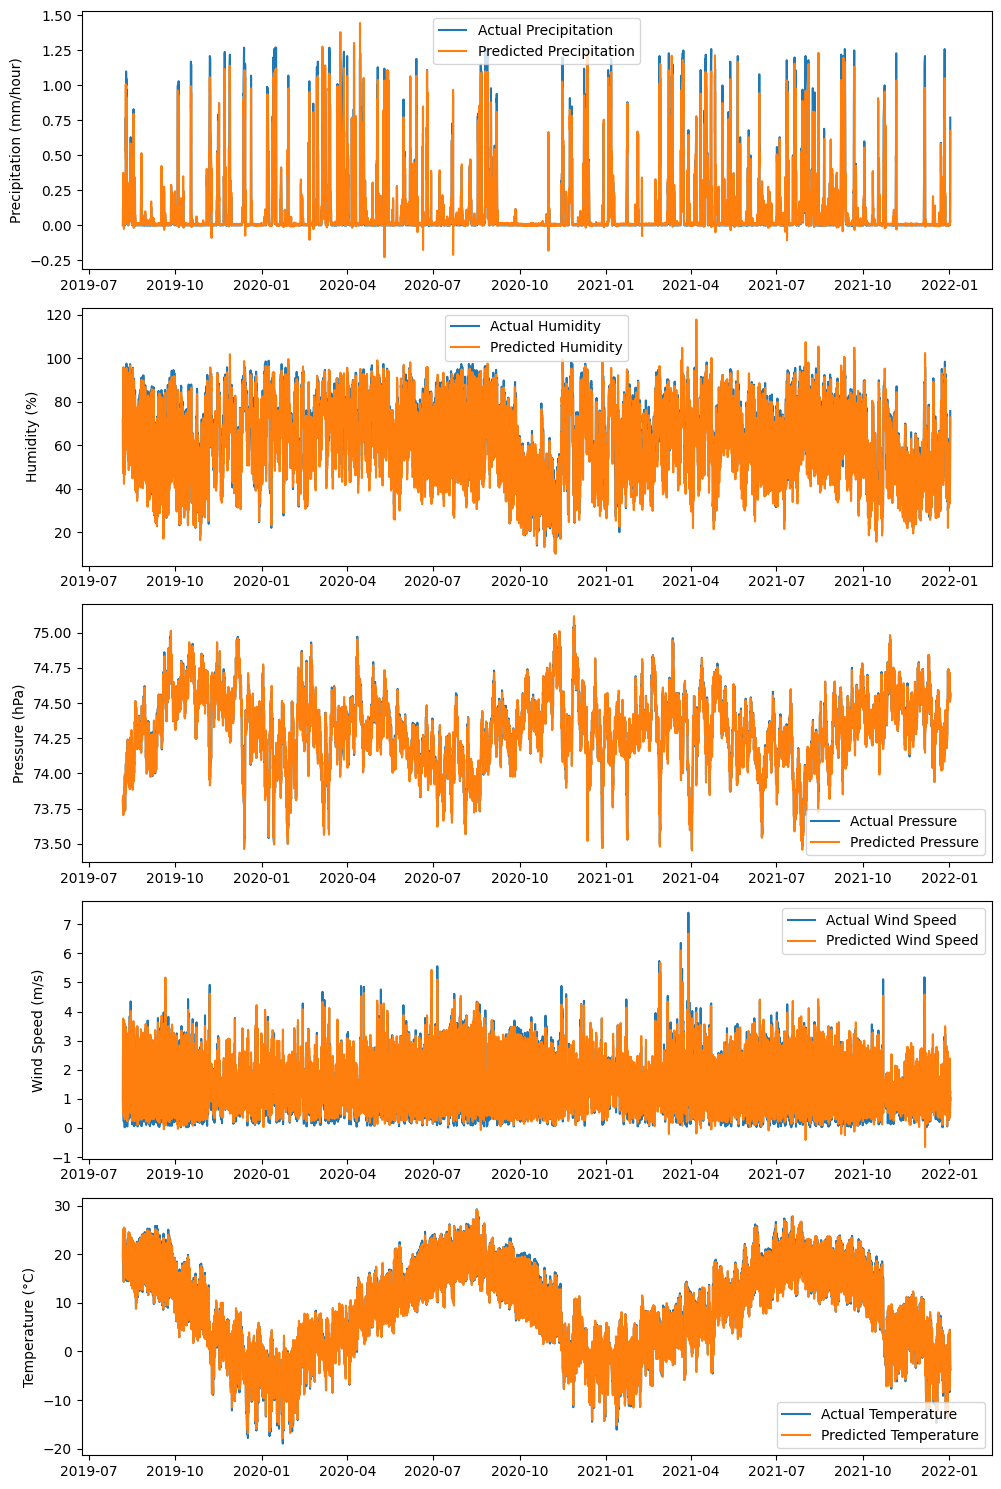

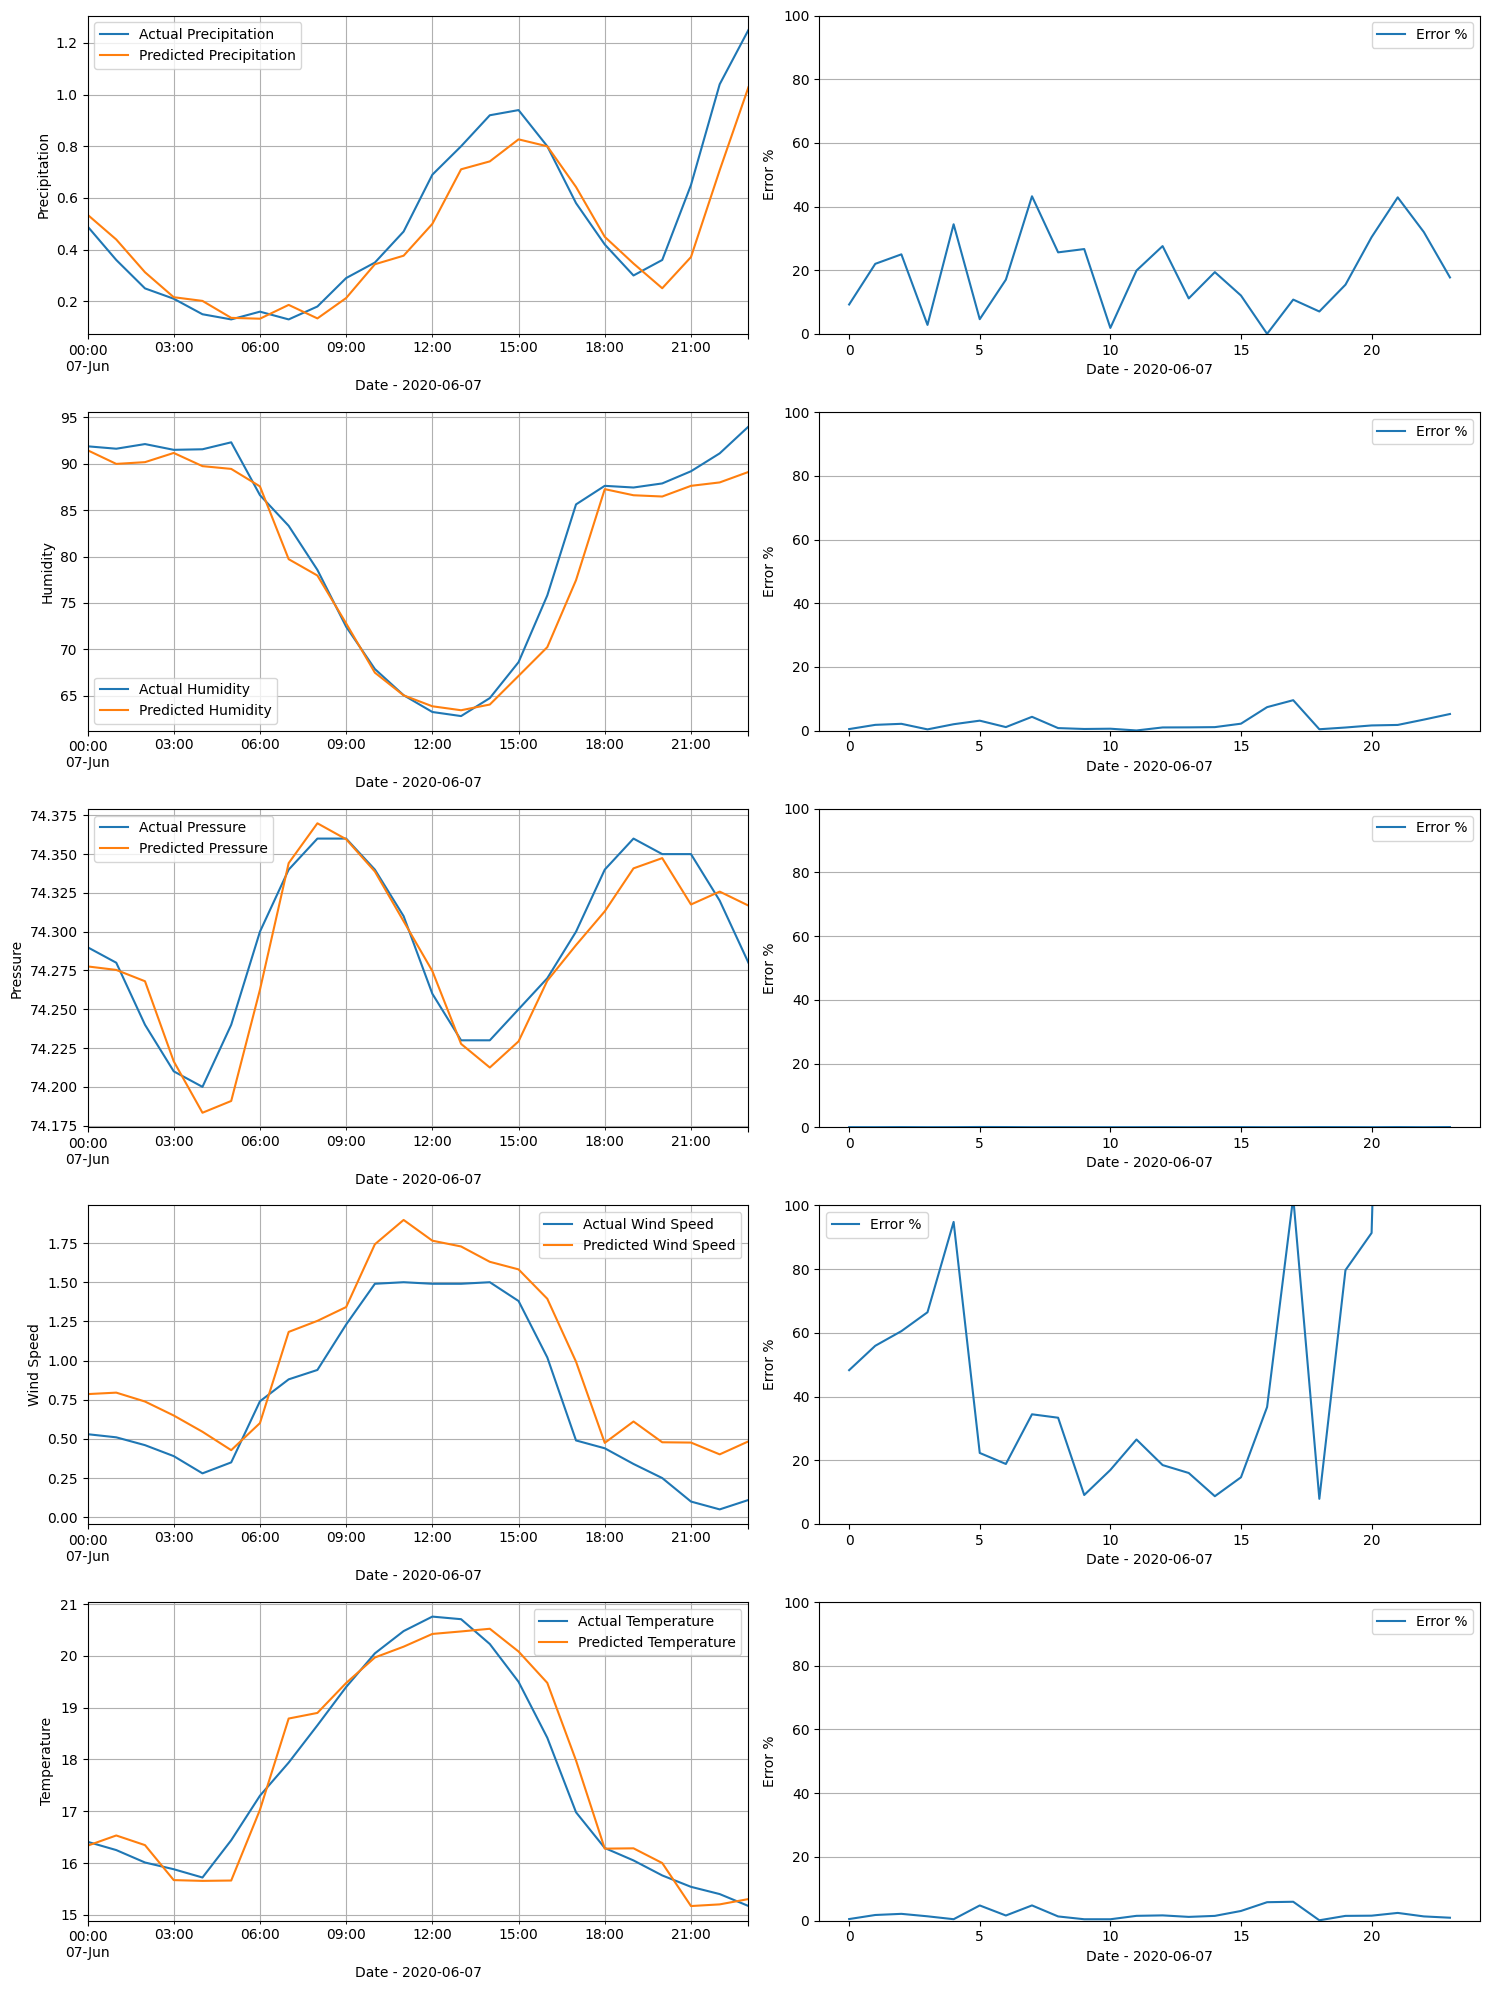

Folder /content/drive/MyDrive/Reaps_Final_Submission/kolkata already exists.
Epoch 1/10
259/259 [==============================] - 3s 6ms/step - loss: 0.0010
Epoch 2/10
259/259 [==============================] - 1s 6ms/step - loss: 9.5164e-04
Epoch 3/10
259/259 [==============================] - 1s 6ms/step - loss: 9.3847e-04
Epoch 4/10
259/259 [==============================] - 1s 5ms/step - loss: 9.3346e-04
Epoch 5/10
259/259 [==============================] - 2s 7ms/step - loss: 9.2706e-04
Epoch 6/10
259/259 [==============================] - 2s 7ms/step - loss: 9.2155e-04
Epoch 7/10
259/259 [==============================] - 2s 7ms/step - loss: 9.1363e-04
Epoch 8/10
259/259 [==============================] - 2s 6ms/step - loss: 9.1247e-04
Epoch 9/10
259/259 [==============================] - 1s 6ms/step - loss: 9.0649e-04
Epoch 10/10
646/646 [==============================] - 2s 2ms/step


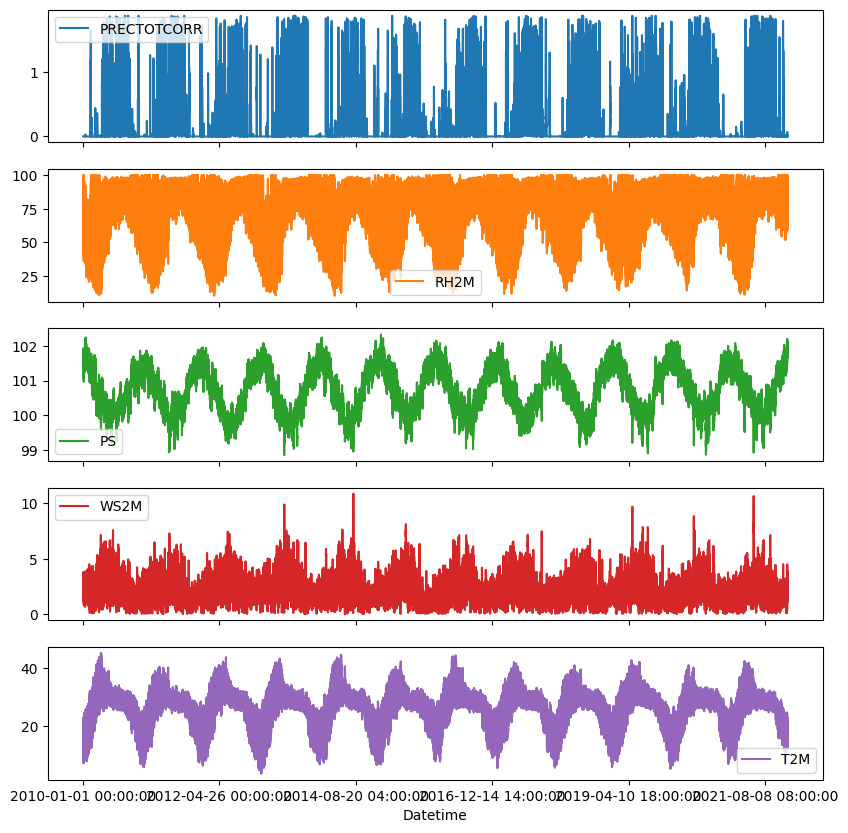

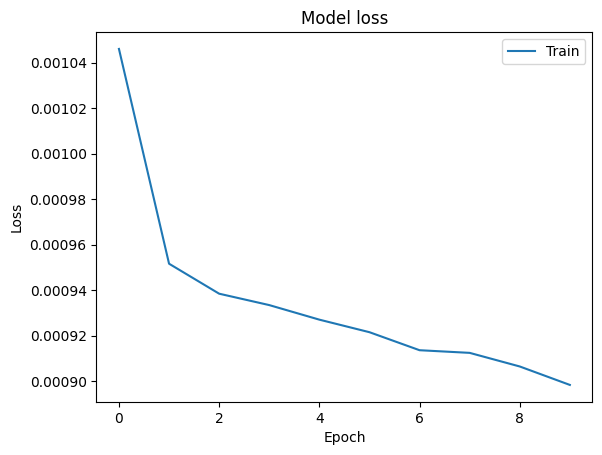

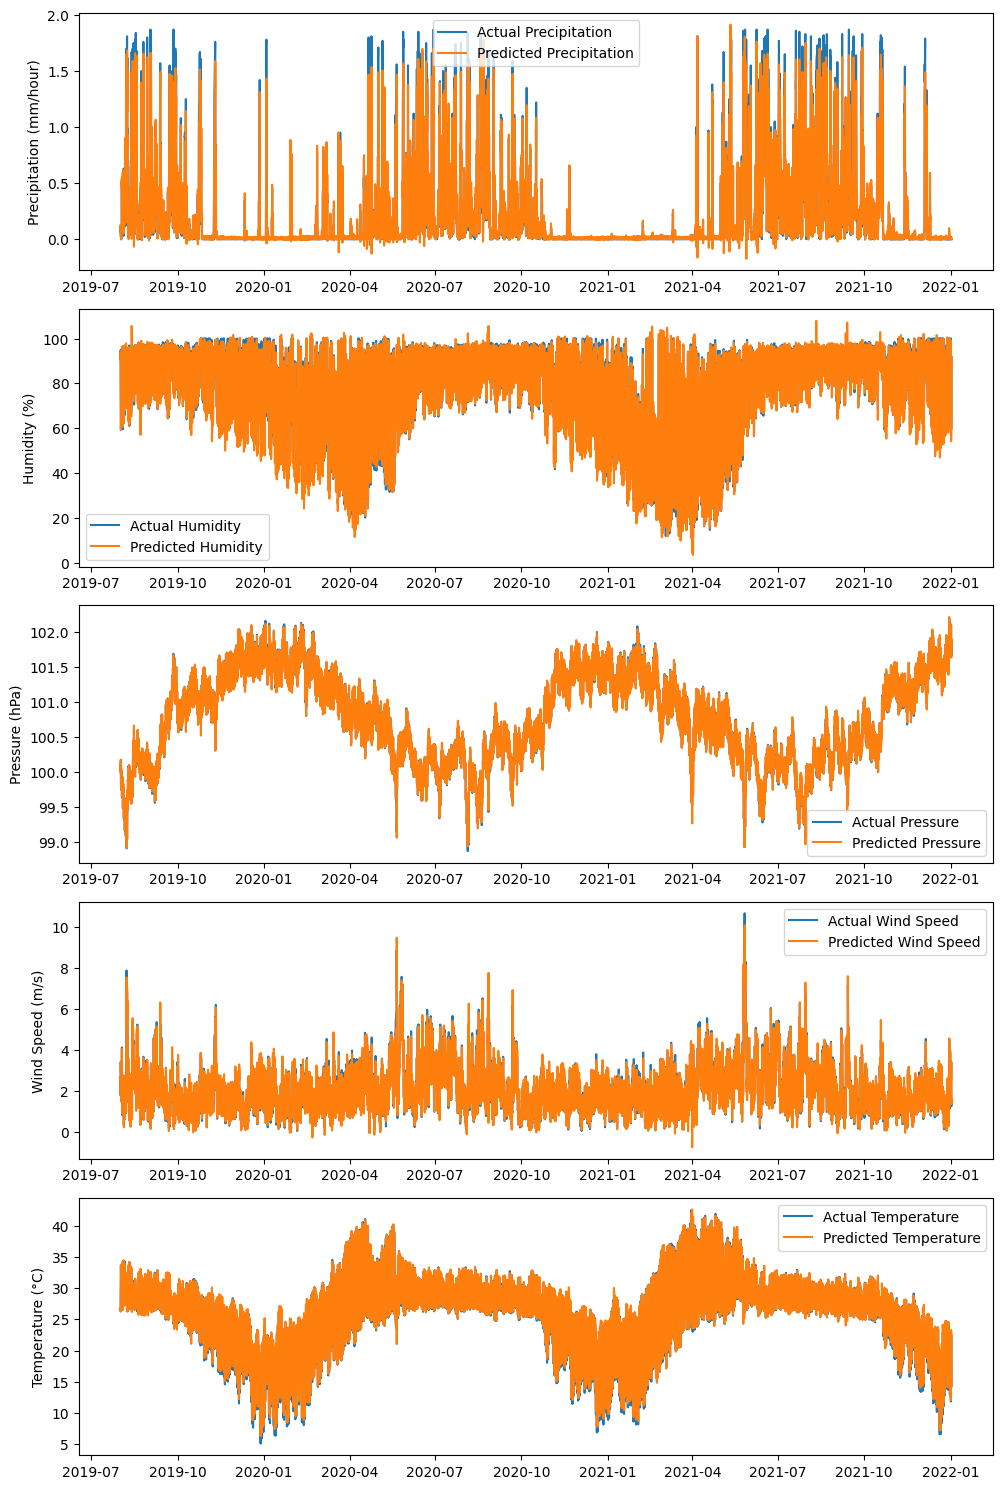

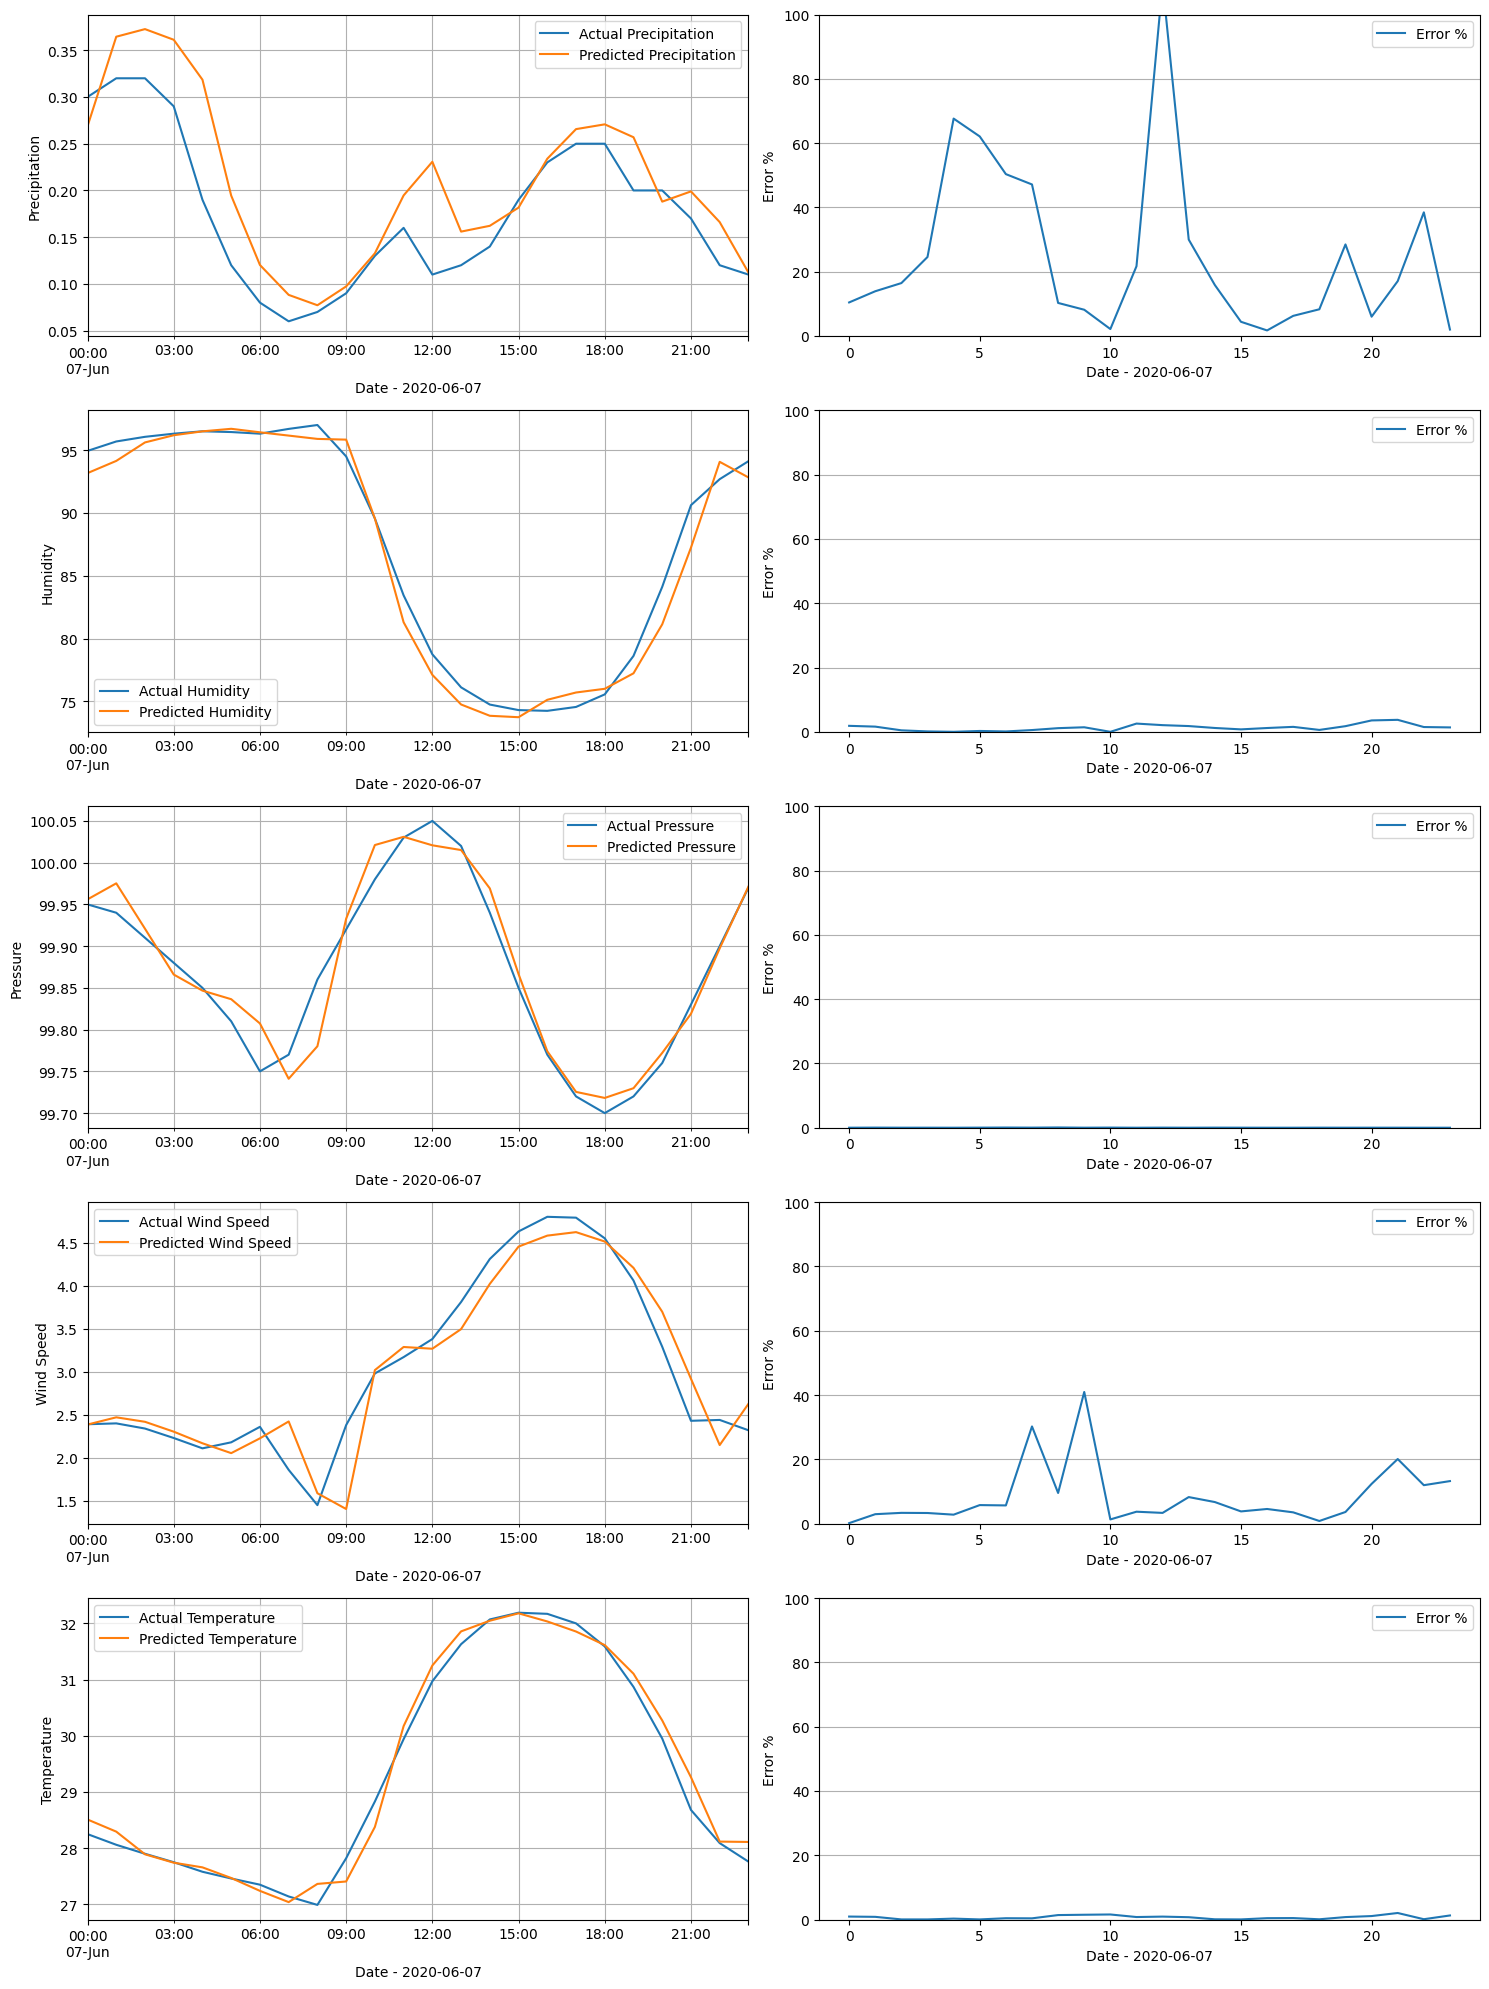

Folder /content/drive/MyDrive/Reaps_Final_Submission/mumbai already exists.
Epoch 1/10
257/257 [==============================] - 4s 6ms/step - loss: 7.6551e-04
Epoch 2/10
257/257 [==============================] - 2s 7ms/step - loss: 7.0695e-04
Epoch 3/10
257/257 [==============================] - 2s 7ms/step - loss: 6.9116e-04
Epoch 4/10
257/257 [==============================] - 2s 7ms/step - loss: 6.8358e-04
Epoch 5/10
257/257 [==============================] - 2s 6ms/step - loss: 6.7669e-04
Epoch 6/10
257/257 [==============================] - 2s 6ms/step - loss: 6.6826e-04
Epoch 7/10
257/257 [==============================] - 2s 6ms/step - loss: 6.6432e-04
Epoch 8/10
257/257 [==============================] - 2s 6ms/step - loss: 6.5627e-04
Epoch 9/10
257/257 [==============================] - 1s 6ms/step - loss: 6.5336e-04
Epoch 10/10
642/642 [==============================] - 2s 3ms/step


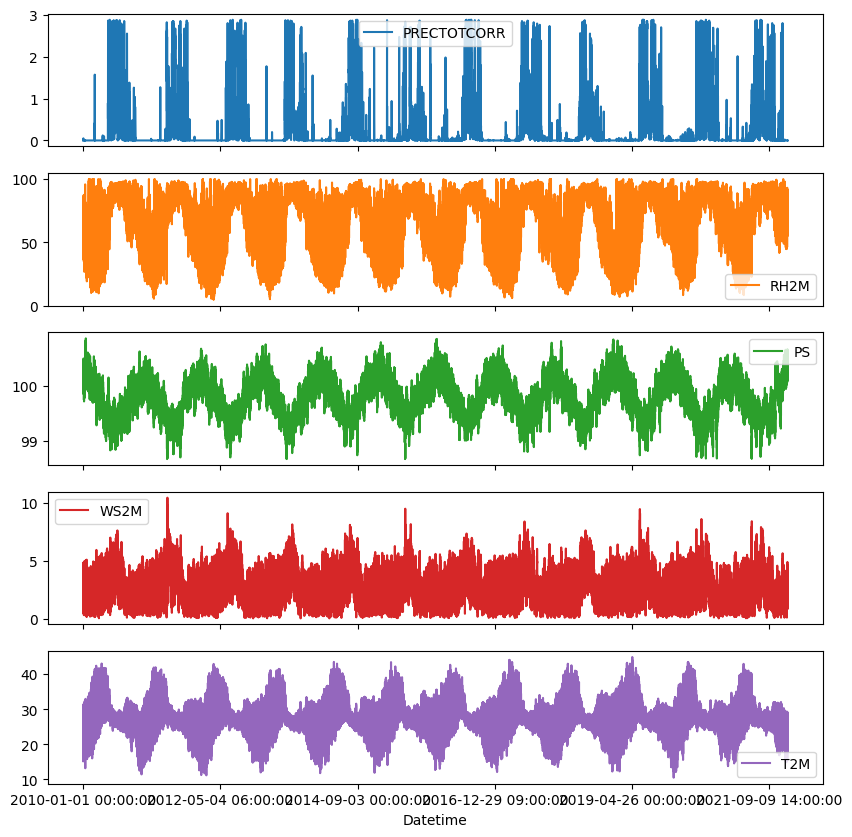

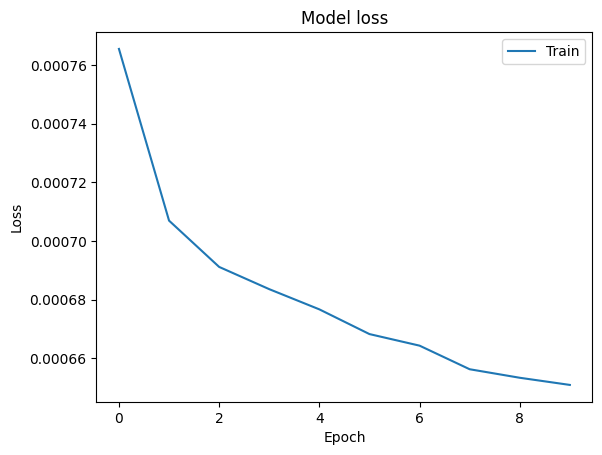

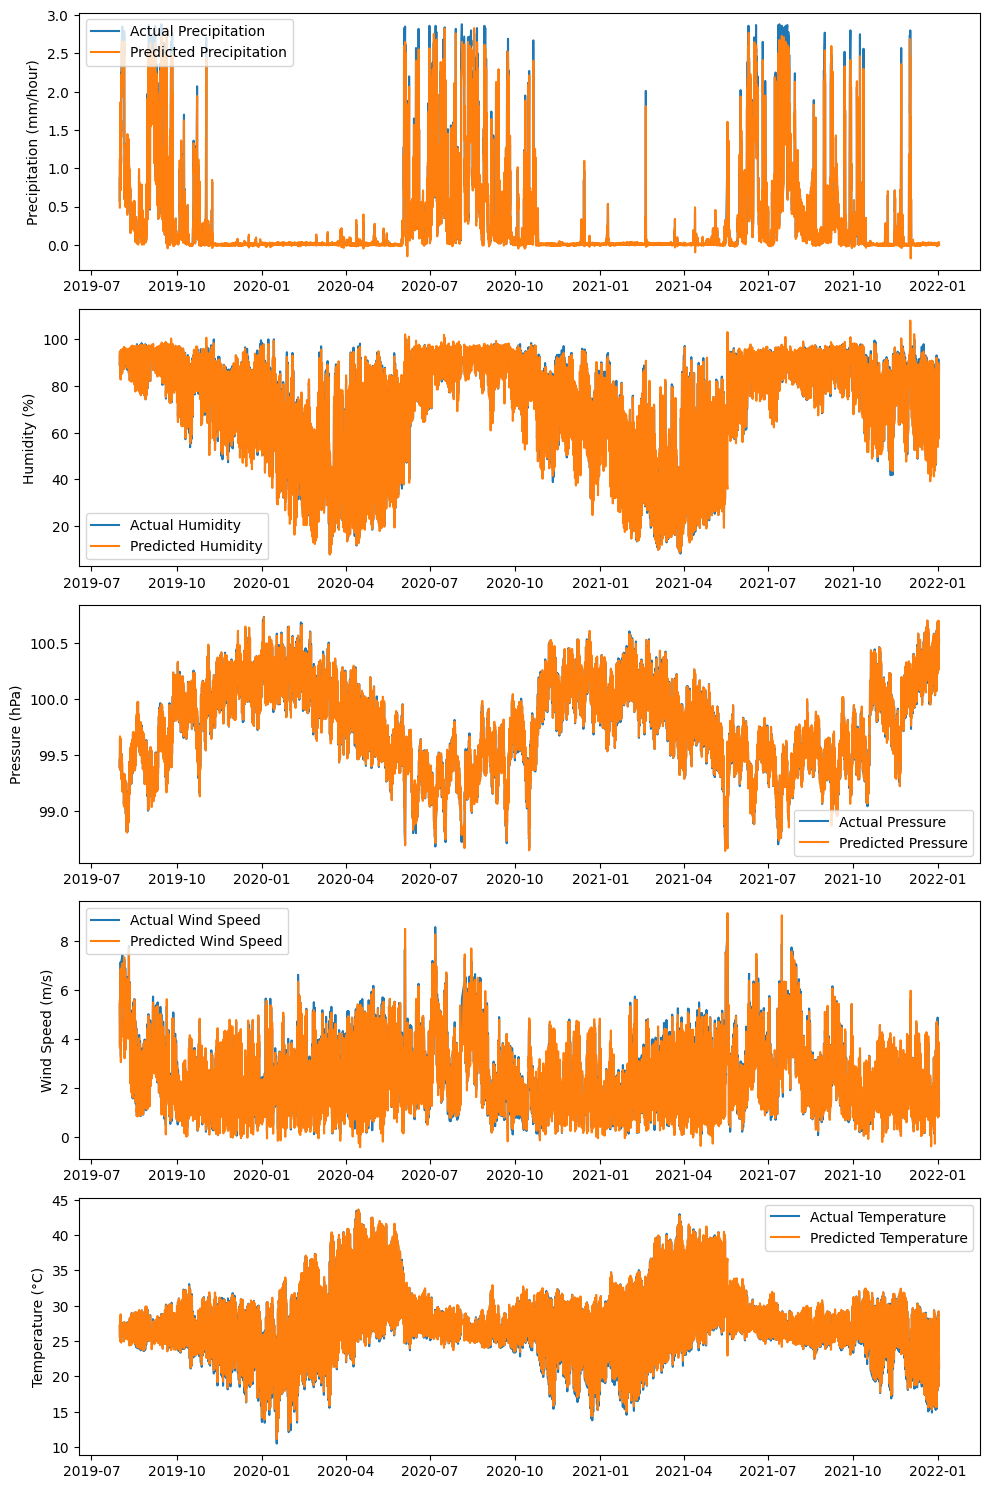

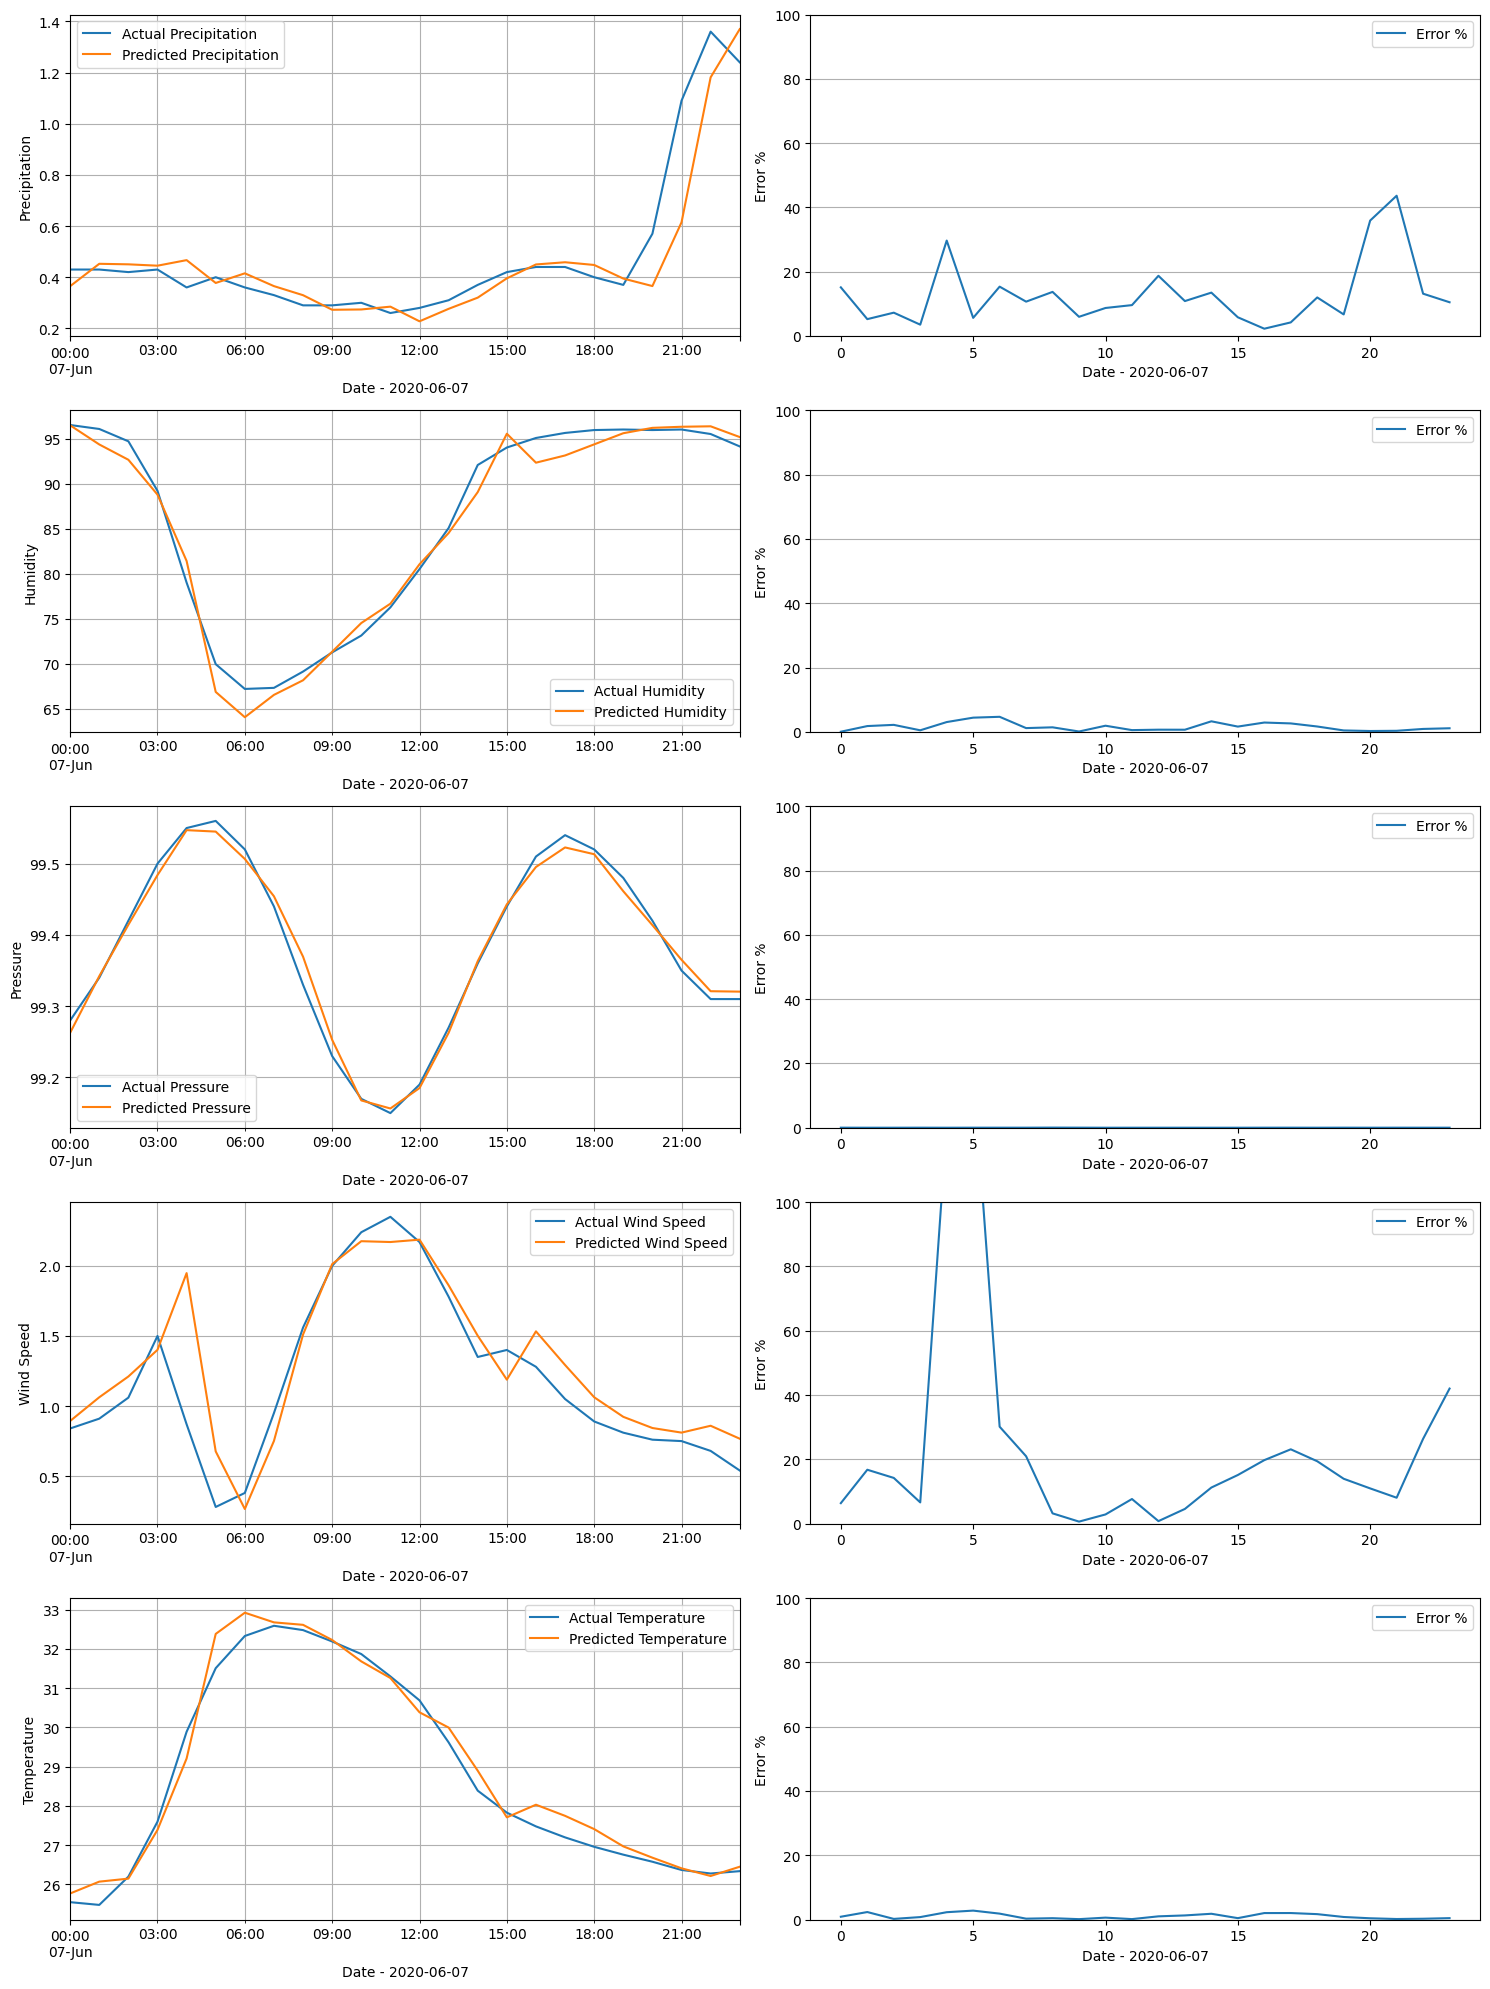

In [ ]:
locations = ['ranchi', 'srinagar', 'kolkata', 'mumbai']
root = '/content/drive/MyDrive/Reaps_Final_Submission/'

for loc in locations :

  folder_path = root + loc

  if not os.path.exists(folder_path):
      os.makedirs(folder_path)
      print(f"Folder {folder_path} created successfully.")
  else:
      print(f"Folder {folder_path} already exists.")

  # Load data
  data = pd.read_csv(f'{root}{loc}.csv')


  # Define the Z-score threshold
  z_threshold = 3
  # Calculate the Z-score for each parameter
  z_scores = np.abs(stats.zscore(data.iloc[:,:4]))
  data = data[(z_scores < z_threshold).all(axis=1)]


  # data.to_csv(f'{path}{name}_test_cleaned.csv', index=False)
  data.set_index('Datetime')[['PRECTOTCORR',	'RH2M',	'PS',	'WS2M',	'T2M']].plot(subplots=True,figsize=(10,10))
  plt.savefig(folder_path + '/' + loc + '_parameters.png')

  # Convert datetime column to datetime object and set it as index
  data['Datetime'] = pd.to_datetime(data['Datetime'])
  dates = data['Datetime']
  data.set_index('Datetime', inplace=True)
  
  # Split data into training and testing sets
  train_size = int(len(data) * 0.8)
  test_size = len(data) - train_size
  train, test = data.iloc[0:train_size,:], data.iloc[train_size:len(data),:]

  # Scale data
  train = train.values
  test = test.values
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler(feature_range=(0, 1))
  train_scaled = scaler.fit_transform(train)
  test_scaled = scaler.transform(test)

  trainX, trainY = create_dataset(train_scaled, look_back)
  testX, testY = create_dataset(test_scaled, look_back)

  # Compile model
  model.compile(loss= custom_loss, optimizer='adam')

  # Fit model on training data
  history = model.fit(trainX, trainY, epochs=10, batch_size=320)

  # Plot the loss function
  fig, ax = plt.subplots()
  ax.plot(history.history['loss'])
  ax.set_title('Model loss')
  ax.set_ylabel('Loss')
  ax.set_xlabel('Epoch')
  ax.legend(['Train'], loc='upper right')
  fig.savefig(folder_path + '/' + loc + '_model_loss.png')

  # Save the model
  model.save(folder_path + '/' + loc + '_model.h5')

  # Make predictions on test data
  predictions = model.predict(testX)
  # Invert scaling for forecasted data
  predictions = scaler.inverse_transform(predictions)
  testY = scaler.inverse_transform(testY)

  # Create figure object
  fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

  # Set common x-axis formatter and locator
  formatter = mdates.AutoDateFormatter(mdates.AutoDateLocator())

  # Plot actual and predicted values for each variable
  axs[0].plot(dates[train_size + look_back + 1: ], testY[:,0], label='Actual Precipitation')
  axs[0].plot(dates[train_size + look_back + 1: ], predictions[:,0], label='Predicted Precipitation')
  axs[0].legend()
  axs[0].xaxis.set_major_formatter(formatter)
  axs[0].xaxis.set_major_locator(mdates.AutoDateLocator())
  axs[0].set_ylabel('Precipitation (mm/hour)')

  axs[1].plot(dates[train_size + look_back + 1: ], testY[:,1], label='Actual Humidity')
  axs[1].plot(dates[train_size + look_back + 1: ], predictions[:,1], label='Predicted Humidity')
  axs[1].legend()
  axs[1].xaxis.set_major_formatter(formatter)
  axs[1].xaxis.set_major_locator(mdates.AutoDateLocator())
  axs[1].set_ylabel('Humidity (%)')

  axs[2].plot(dates[train_size + look_back + 1: ], testY[:,2], label='Actual Pressure')
  axs[2].plot(dates[train_size + look_back + 1: ], predictions[:,2], label='Predicted Pressure')
  axs[2].legend()
  axs[2].xaxis.set_major_formatter(formatter)
  axs[2].xaxis.set_major_locator(mdates.AutoDateLocator())
  axs[2].set_ylabel('Pressure (hPa)')

  axs[3].plot(dates[train_size + look_back + 1: ], testY[:,3], label='Actual Wind Speed')
  axs[3].plot(dates[train_size + look_back + 1: ], predictions[:,3], label='Predicted Wind Speed')
  axs[3].legend()
  axs[3].xaxis.set_major_formatter(formatter)
  axs[3].xaxis.set_major_locator(mdates.AutoDateLocator())
  axs[3].set_ylabel('Wind Speed (m/s)')

  axs[4].plot(dates[train_size + look_back + 1: ], testY[:,4], label='Actual Temperature')
  axs[4].plot(dates[train_size + look_back + 1: ], predictions[:,4], label='Predicted Temperature')
  axs[4].legend()
  axs[4].xaxis.set_major_formatter(formatter)
  axs[4].xaxis.set_major_locator(mdates.AutoDateLocator())
  axs[4].set_ylabel('Temperature (°C)')

  # Show plot
  plt.tight_layout()
  plt.savefig(folder_path + '/' + loc + '_predictions.png')

  query_date = '2020-06-07'
  search_date = pd.to_datetime(query_date)
  # search for a particular date
  matching_dates = dates.loc[dates.dt.date == search_date.date()]
  indices = matching_dates.index.tolist()
  cols = ['Precipitation', 'Humidity', 'Pressure', 'Wind Speed', 'Temperature']
  first_index = train_size + look_back + 1
  fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

  for i in range(5):
      df_temp = pd.DataFrame({'Date': [dates[idx] for idx in indices], 
                              'Actual': [testY[idx - first_index, i] for idx in indices], 
                              'Predicted': [predictions[idx - first_index, i] for idx in indices]})
      # create the plot for actual and predicted values
      ax1 = df_temp.set_index('Date')[['Actual', 'Predicted']].plot(ax=axes[i][0])

      # set the legend for actual and predicted values
      ax1.legend(['Actual ' + cols[i], 'Predicted ' + cols[i]])

      # set the x-axis and y-axis labels for actual and predicted values
      ax1.set_xlabel('Date - ' + query_date)
      ax1.grid('on', which='minor', axis='x')
      ax1.grid('on', which='major', axis='y')
      ax1.set_ylabel(cols[i])

      # calculate and plot the error percentage
      error = abs(df_temp['Actual'] - df_temp['Predicted']) / df_temp['Actual'] * 100
      ax2 = error.plot(ax=axes[i][1])
      
      # set the legend for error percentage
      ax2.legend(['Error %'])
      ax2.set_ylim([0, 100])
      # set the x-axis and y-axis labels for error percentage
      ax2.set_xlabel('Date - ' + query_date)
      ax2.grid('on', which='minor', axis='x')
      ax2.grid('on', which='major', axis='y')
      ax2.set_ylabel('Error %')

  # adjust the layout of the subplots
  plt.tight_layout()
  plt.savefig(folder_path + '/' + loc + '_single_day.png')
  plt.show()

